<a href="https://colab.research.google.com/github/gorleramyasri/Thesis/blob/main/thesis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import and connect drive


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import numpy as np

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path="/content/drive/MyDrive/MTECH2YPROJECT/MTech2y/DataAnalysis/Datastes/sample(r).csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,2023-10-30 11:23:04.937161,Core-0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,CCX-0,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,2023-10-30 11:23:04.937193,Utilization (%),Eff Freq,IPC (Sys + User),CPI (Sys + User),Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),...,L2 Miss from HWPF (pti),L2 Hit (pti),L2 Hit from IC Miss (pti),L2 Hit from DC Miss (pti),L2 Hit from HWPF (pti),L3 Access,L3 Miss,L3 Miss %,Ave L3 Miss Latency,NaN
1,2023-10-30 11:23:04.937216,18.79,1901.27,0.92,1.09,0.02,0.39,0.45,153.88,60.23,...,4.66,61.83,41.63,15.33,4.87,627209.00,57953.00,9.24,446.89,NaN
2,2023-10-30 11:23:04.937226,29.71,1976.42,0.97,1.03,0.02,0.41,0.48,163.75,67.52,...,7.16,52.76,38.37,9.02,5.37,525262.00,71201.00,13.56,602.03,NaN
3,2023-10-30 11:23:04.937235,17.17,1804.29,0.99,1.01,0.02,0.39,0.48,178.58,70.40,...,8.63,18.49,9.07,6.08,3.34,481940.00,66661.00,13.83,476.75,NaN
4,2023-10-30 11:23:04.937243,4.18,1625.43,0.86,1.17,0.01,0.13,0.15,37.92,4.75,...,2.51,18.64,10.10,7.91,0.63,47191.00,5707.00,12.09,415.62,NaN


# dataset modify and normalise

In [6]:
df.columns = df.iloc[0]
df = df.iloc[1:]

df = df.rename(columns={'2023-10-30 11:23:04.937193': 'time'})


In [7]:
df

,time,Utilization (%),Eff Freq,IPC (Sys + User),CPI (Sys + User),Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),...,L2 Miss from HWPF (pti),L2 Hit (pti),L2 Hit from IC Miss (pti),L2 Hit from DC Miss (pti),L2 Hit from HWPF (pti),L3 Access,L3 Miss,L3 Miss %,Ave L3 Miss Latency,NaN
1,2023-10-30 11:23:04.937216,18.79,1901.27,0.92,1.09,0.02,0.39,0.45,153.88,60.23,...,4.66,61.83,41.63,15.33,4.87,627209.00,57953.00,9.24,446.89,NaN
2,2023-10-30 11:23:04.937226,29.71,1976.42,0.97,1.03,0.02,0.41,0.48,163.75,67.52,...,7.16,52.76,38.37,9.02,5.37,525262.00,71201.00,13.56,602.03,NaN
3,2023-10-30 11:23:04.937235,17.17,1804.29,0.99,1.01,0.02,0.39,0.48,178.58,70.40,...,8.63,18.49,9.07,6.08,3.34,481940.00,66661.00,13.83,476.75,NaN
4,2023-10-30 11:23:04.937243,4.18,1625.43,0.86,1.17,0.01,0.13,0.15,37.92,4.75,...,2.51,18.64,10.10,7.91,0.63,47191.00,5707.00,12.09,415.62,NaN
5,2023-10-30 11:23:04.937252,24.45,1778.19,0.99,1.01,0.02,0.39,0.45,166.42,65.27,...,3.41,26.31,21.66,3.19,1.47,504480.00,47421.00,9.40,936.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,2023-10-30 11:23:05.025953,2.23,1499.40,0.89,1.12,0.03,0.26,0.23,81.38,21.50,...,7.01,25.55,7.01,11.26,7.28,67697.00,5890.00,8.70,300.27,NaN
9886,2023-10-30 11:23:05.025960,5.24,1499.59,0.82,1.21,0.02,0.17,0.16,45.60,7.73,...,12.11,22.09,4.33,10.76,7.01,117551.00,15624.00,13.29,262.85,NaN
9887,2023-10-30 11:23:05.025970,3.47,1499.75,0.92,1.09,0.01,0.30,0.29,68.99,20.71,...,13.29,23.99,5.14,12.06,6.79,54089.00,3541.00,6.55,337.76,NaN
9888,2023-10-30 11:23:05.025977,4.33,1499.67,0.80,1.25,0.02,0.24,0.22,123.15,29.41,...,6.38,25.74,7.42,10.85,7.47,89078.00,5318.00,5.97,318.01,NaN


In [8]:
df.columns

Index([                                          'time',
                                      'Utilization (%)',
                                             'Eff Freq',
                                     'IPC (Sys + User)',
                                     'CPI (Sys + User)',
                           'Branch Misprediction Ratio',
                            'IC (32B) Fetch Miss Ratio',
                      'Op Cache (64B) Fetch Miss Ratio',
                                      'IC Access (pti)',
                                        'IC Miss (pti)',
                                      'DC Access (pti)',
                         'DC Fills From Same CCX (pti)',
       'DC Fills From different CCX in same node (pti)',
                     'DC Fills From Local Memory (pti)',
                 'DC Fills From Remote CCX Cache (pti)',
                    'DC Fills From Remote Memory (pti)',
                                   'All DC Fills (pti)',
                               

In [9]:
columns_to_drop = ['L3 Miss %','L2 Hit (pti)','L2 Hit from IC Miss (pti)','L2 Hit from DC Miss (pti)','All DC Fills (pti)','CPI (Sys + User)','Utilization (%)','L2 Hit from HWPF (pti)']
df = df.drop(columns=columns_to_drop,axis=0)
df


,time,Eff Freq,IPC (Sys + User),Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),DC Access (pti),DC Fills From Same CCX (pti),...,L2 Access from DC Miss (pti),L2 Access from HWPF (pti),L2 Miss (pti),L2 Miss from IC Miss (pti),L2 Miss from DC Miss (pti),L2 Miss from HWPF (pti),L3 Access,L3 Miss,Ave L3 Miss Latency,NaN
1,2023-10-30 11:23:04.937216,1901.27,0.92,0.02,0.39,0.45,153.88,60.23,443.37,23.18,...,33.30,9.52,24.63,11.43,8.54,4.66,627209.00,57953.00,446.89,NaN
2,2023-10-30 11:23:04.937226,1976.42,0.97,0.02,0.41,0.48,163.75,67.52,474.98,36.30,...,34.44,12.53,56.12,30.81,18.16,7.16,525262.00,71201.00,602.03,NaN
3,2023-10-30 11:23:04.937235,1804.29,0.99,0.02,0.39,0.48,178.58,70.40,479.66,26.33,...,20.26,11.97,24.14,1.05,14.46,8.63,481940.00,66661.00,476.75,NaN
4,2023-10-30 11:23:04.937243,1625.43,0.86,0.01,0.13,0.15,37.92,4.75,539.19,22.91,...,23.15,3.13,21.89,6.34,13.04,2.51,47191.00,5707.00,415.62,NaN
5,2023-10-30 11:23:04.937252,1778.19,0.99,0.02,0.39,0.45,166.42,65.27,456.18,22.15,...,23.17,4.88,45.27,33.03,8.83,3.41,504480.00,47421.00,936.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,2023-10-30 11:23:05.025953,1499.40,0.89,0.03,0.26,0.23,81.38,21.50,510.32,22.78,...,24.00,14.29,23.58,2.43,14.15,7.01,67697.00,5890.00,300.27,NaN
9886,2023-10-30 11:23:05.025960,1499.59,0.82,0.02,0.17,0.16,45.60,7.73,561.69,21.07,...,25.82,19.12,28.15,3.01,13.03,12.11,117551.00,15624.00,262.85,NaN
9887,2023-10-30 11:23:05.025970,1499.75,0.92,0.01,0.30,0.29,68.99,20.71,396.98,28.49,...,26.68,20.08,30.48,4.75,12.44,13.29,54089.00,3541.00,337.76,NaN
9888,2023-10-30 11:23:05.025977,1499.67,0.80,0.02,0.24,0.22,123.15,29.41,645.67,34.33,...,23.65,13.85,24.09,1.52,16.20,6.38,89078.00,5318.00,318.01,NaN


In [10]:
# Convert relevant columns to numeric data type
numeric_columns = ['Eff Freq',

                      'Branch Misprediction Ratio',
                      'IC (32B) Fetch Miss Ratio',
                      'Op Cache (64B) Fetch Miss Ratio',
                      'IC Access (pti)',
                      'IC Miss (pti)',
                      'DC Access (pti)',
                      'DC Fills From Same CCX (pti)',
                      'DC Fills From different CCX in same node (pti)',
                      'DC Fills From Local Memory (pti)',
                      'DC Fills From Remote CCX Cache (pti)',
                      'DC Fills From Remote Memory (pti)',
                      'L2 Access (pti)',
                      'L2 Access from IC Miss (pti)',
                      'L2 Access from DC Miss (pti)',
                      'L2 Access from HWPF (pti)',
                      'L2 Miss (pti)',
                      'L2 Miss from IC Miss (pti)',
                      'L2 Miss from DC Miss (pti)',
                      'L2 Miss from HWPF (pti)',
                      'L3 Access',
                      'L3 Miss',
                      'Ave L3 Miss Latency',
                      'IPC (Sys + User)']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')





# plotting

<Figure size 1000x1000 with 0 Axes>

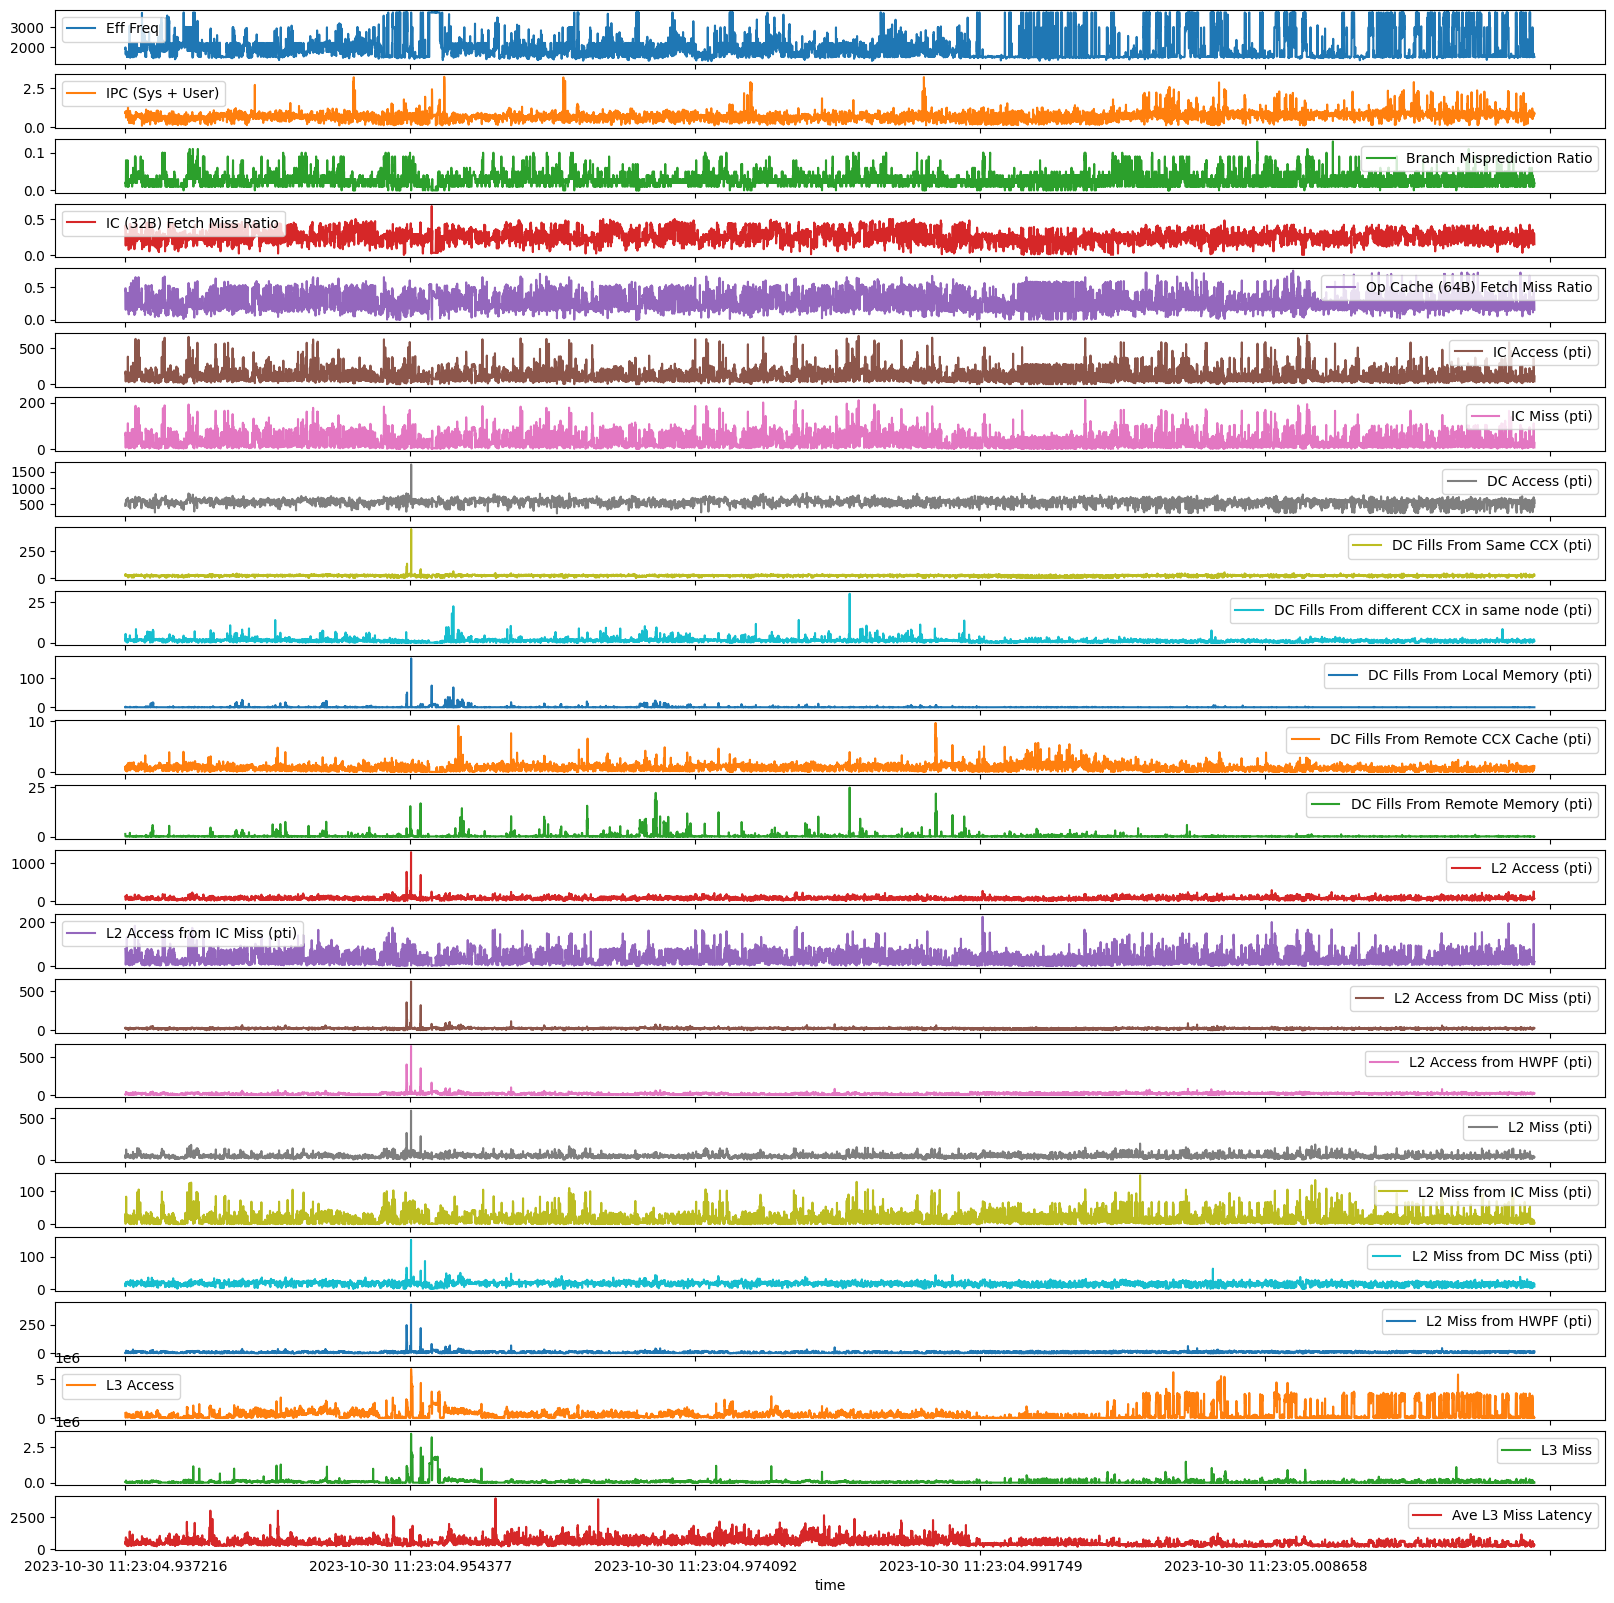

In [ ]:

# Now try plotting again
plt.figure(figsize=(10, 10))
#df.set_index('time')[numeric_columns].plot(subplots=True,layout=(5, 5))
df.set_index('time')[numeric_columns].plot(subplots=True,figsize=(20, 20))
plt.show()

# scaling

In [11]:
df_input=df[numeric_columns]

In [12]:
df_input.describe()

,Eff Freq,Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),DC Access (pti),DC Fills From Same CCX (pti),DC Fills From different CCX in same node (pti),DC Fills From Local Memory (pti),...,L2 Access from DC Miss (pti),L2 Access from HWPF (pti),L2 Miss (pti),L2 Miss from IC Miss (pti),L2 Miss from DC Miss (pti),L2 Miss from HWPF (pti),L3 Access,L3 Miss,Ave L3 Miss Latency,IPC (Sys + User)
count,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,...,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9.889000e+03,9.889000e+03,9889.000000,9889.000000
mean,1936.581823,0.027080,0.258558,0.267778,118.609082,33.796694,555.454213,21.730918,1.256490,0.612118,...,25.639923,16.155426,42.508311,16.422365,15.753419,10.332402,5.183703e+05,6.674958e+04,546.003243,0.691318
std,598.899930,0.016246,0.087871,0.134147,88.704834,30.009441,90.319320,8.108108,1.073095,3.149289,...,11.312412,13.846506,22.660340,16.059104,6.276593,8.764653,7.693422e+05,1.731563e+05,256.333696,0.299288
min,1291.050000,0.000000,0.000000,0.000000,0.440000,0.010000,208.720000,0.000000,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.730000e+02,5.400000e+01,168.920000,0.080000
25%,1499.840000,0.020000,0.200000,0.170000,57.670000,11.900000,512.630000,18.840000,0.700000,0.040000,...,22.590000,6.610000,28.170000,4.600000,12.120000,4.240000,5.419900e+04,4.114000e+03,378.580000,0.520000
50%,1738.210000,0.020000,0.250000,0.220000,96.690000,23.240000,568.640000,22.560000,1.150000,0.070000,...,26.340000,15.710000,38.580000,13.620000,16.440000,9.530000,2.361560e+05,2.972900e+04,481.470000,0.680000
75%,2160.750000,0.030000,0.320000,0.360000,154.760000,48.770000,613.230000,25.440000,1.580000,0.130000,...,29.190000,23.150000,53.920000,22.170000,20.060000,15.640000,5.854690e+05,7.831600e+04,640.300000,0.830000
max,3736.430000,0.130000,0.680000,0.750000,683.740000,212.370000,1723.350000,451.820000,30.090000,169.850000,...,627.940000,647.440000,587.500000,148.950000,152.480000,423.340000,6.280242e+06,3.474174e+06,3953.210000,3.220000


In [13]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [14]:
len(data_scaled[:,1])

9889

In [15]:
data_scaled

array([[0.24953995, 0.15384615, 0.57352941, ..., 0.0166658 , 0.07345367,
        0.26751592],
       [0.28027137, 0.15384615, 0.60294118, ..., 0.02047914, 0.11444947,
        0.28343949],
       [0.20988149, 0.15384615, 0.57352941, ..., 0.01917234, 0.08134419,
        0.28980892],
       ...,
       [0.08534461, 0.07692308, 0.44117647, ..., 0.00100371, 0.04461603,
        0.26751592],
       [0.08531189, 0.15384615, 0.35294118, ..., 0.0015152 , 0.03939709,
        0.22929936],
       [0.08543866, 0.15384615, 0.22058824, ..., 0.0016194 , 0.04458696,
        0.24840764]])

In [16]:
len(data_scaled[:,0])

9889

In [17]:
features = data_scaled[:, :-1]  # Exclude the last column to get features
target = data_scaled[:, -1]     # Select only the last column as the target variable


In [18]:
TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]
#TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[2.49539949e-01, 1.53846154e-01, 5.73529412e-01, 6.00000000e-01,
          2.24557295e-01, 2.83575061e-01, 1.54922324e-01, 5.13036165e-02,
          6.97906281e-02, 4.12128349e-04, 1.01554404e-01, 5.24405002e-02,
          9.36457984e-02, 3.41055796e-01, 5.30154635e-02, 1.47040652e-02,
          4.19234043e-02, 7.67371601e-02, 5.60073452e-02, 1.10077007e-02,
          9.98310660e-02, 1.66658031e-02, 7.34536729e-02],
         [2.80271369e-01, 1.53846154e-01, 6.02941176e-01, 6.40000000e-01,
          2.39001903e-01, 3.17903560e-01, 1.75792108e-01, 8.03417290e-02,
          2.89132602e-02, 4.71003827e-04, 3.21243523e-02, 8.06776926e-04,
          9.19902856e-02, 3.12582899e-01, 5.48309525e-02, 1.93531447e-02,
          9.55234043e-02, 2.06847936e-01, 1.19097587e-01, 1.69131195e-02,
          8.35973872e-02, 2.04791429e-02, 1.14449474e-01]]]),
 array([0.28980892]))

# splitting train test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.30,random_state=123,shuffle=False)

In [19]:
x_train.shape

(6922, 23)

In [20]:
x_test.shape

(2967, 23)

# time series generator with winlength , sampling rate

In [23]:
win_length=200
batch_size=32
num_features=23
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)


In [ ]:
train_generator[0]

# Models

In [ ]:
# MODEL 1
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(32,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [ ]:
# MODEL 2
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 200, 128)          77824     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 200, 128)          0         
                                                                 
 lstm_12 (LSTM)              (None, 200, 64)           49408     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 200, 64)           0         
                                                                 
 dropout_8 (Dropout)         (None, 200, 64)           0         
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_9 (Dropout)         (None, 64)               

# model tuning

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
len(x_train[0])

23

In [24]:
X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, shuffle=False)

In [ ]:
len(X_train[0])

23

In [ ]:
len(x_val[0])

23

In [ ]:
win_length=200

In [25]:
train_generator=TimeseriesGenerator(X_train,Y_train,length=win_length, sampling_rate=1,batch_size=batch_size)
val_generator=TimeseriesGenerator(x_val,y_val,length=win_length,sampling_rate=1,batch_size=batch_size)

In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [26]:
import tensorflow as tf
from sklearn.model_selection import ParameterGrid

# Define the function to create the model
def create_model(optimizer='adam', dropout_rate=0.0, units=64):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units, input_shape=(win_length, num_features), return_sequences=True),
        tf.keras.layers.LeakyReLU(alpha=0.5),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.LSTM(units // 2, return_sequences=False),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Define hyperparameters grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'units': [32, 64, 128]
}

best_score = float('inf')
best_model = None
best_params = None

# Perform manual grid search
for params in ParameterGrid(param_grid):
    model = create_model(**params)
    print("epoch:",params)
    history = model.fit(train_generator, validation_data=val_generator, epochs=5, verbose=0)
    val_loss = history.history['val_loss'][-1]
    if val_loss < best_score:
        best_score = val_loss
        best_model = model
        best_params = params

print("Best validation loss:", best_score)
print("Best parameters:", best_params)


epoch: {'dropout_rate': 0.2, 'optimizer': 'adam', 'units': 32}
epoch: {'dropout_rate': 0.2, 'optimizer': 'adam', 'units': 64}
epoch: {'dropout_rate': 0.2, 'optimizer': 'adam', 'units': 128}
epoch: {'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'units': 32}
epoch: {'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'units': 64}
epoch: {'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'units': 128}
epoch: {'dropout_rate': 0.3, 'optimizer': 'adam', 'units': 32}
epoch: {'dropout_rate': 0.3, 'optimizer': 'adam', 'units': 64}
epoch: {'dropout_rate': 0.3, 'optimizer': 'adam', 'units': 128}
epoch: {'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'units': 32}
epoch: {'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'units': 64}
epoch: {'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'units': 128}
epoch: {'dropout_rate': 0.4, 'optimizer': 'adam', 'units': 32}
epoch: {'dropout_rate': 0.4, 'optimizer': 'adam', 'units': 64}
epoch: {'dropout_rate': 0.4, 'optimizer': 'adam', 'units': 128}
epoch: {'dropout_rate': 0.4, 'op

In [ ]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   input_shape=(win_length, 23)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning')

tuner.search(X_train, Y_train,
             epochs=10,
             validation_data=(x_val, y_val))

best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from my_dir/lstm_hyperparameter_tuning/tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
256               |128               |units

Epoch 1/10


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, i

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file3d2vr0fh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 200, 23), found shape=(None, 23)



# training

In [27]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
best_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])
history=best_model.fit(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50
167/167 [==============================] - 9s 28ms/step - loss: 0.0072 - mean_absolute_error: 0.0567 - val_loss: 0.0137 - val_mean_absolute_error: 0.0854
Epoch 2/50
167/167 [==============================] - 3s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0554 - val_loss: 0.0131 - val_mean_absolute_error: 0.0827
Epoch 3/50
167/167 [==============================] - 3s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0547 - val_loss: 0.0129 - val_mean_absolute_error: 0.0830
Epoch 4/50
167/167 [==============================] - 4s 24ms/step - loss: 0.0068 - mean_absolute_error: 0.0548 - val_loss: 0.0122 - val_mean_absolute_error: 0.0806
Epoch 5/50
167/167 [==============================] - 3s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0544 - val_loss: 0.0124 - val_mean_absolute_error: 0.0823
Epoch 6/50
167/167 [==============================] - 3s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0543 - val_loss: 0.0126 - val_mean_absolute_error: 0.0827


# evaluate

In [28]:
evaluation_result=best_model.evaluate(test_generator,verbose=0)
print("loss:",evaluation_result[0])
# mse or r^2 for ipc pred and ipc org

loss: 0.012644298374652863


# prediction

In [51]:
trainp=best_model.predict(train_generator)

167/167 [==============================] - 2s 10ms/step


In [29]:
predictions=best_model.predict(test_generator)
print(predictions)

87/87 [==============================] - 2s 11ms/step
[[0.16903588]
 [0.16784115]
 [0.17287356]
 ...
 [0.18036318]
 [0.1816287 ]
 [0.18110648]]


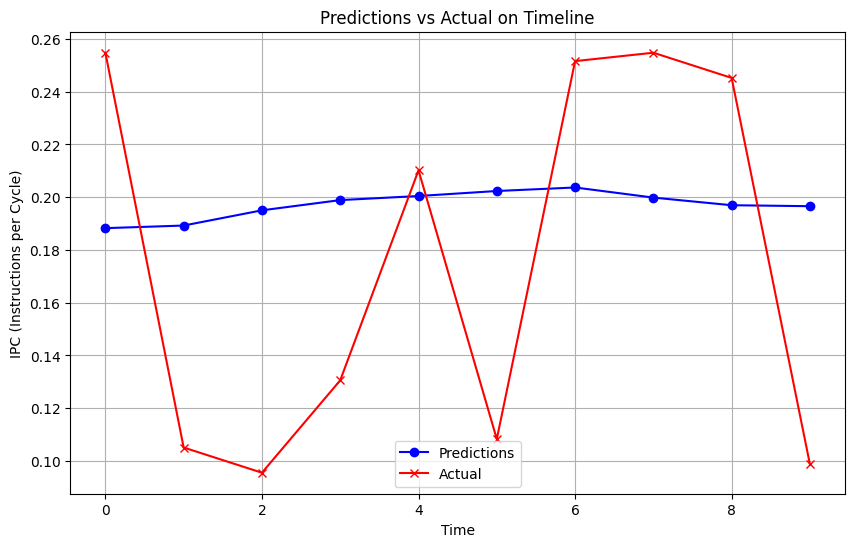

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictions and y_test are numpy arrays
# predictions = model.predict(X_test)
# y_test = ...

# Generate a timeline
timeline = np.arange(10)

# Plot predictions and actual values
plt.figure(figsize=(10, 6))
#plt.plot(timeline, predictions[0:10], label='Predictions', marker='o', color='blue')
#plt.plot(timeline, y_test[win_length:210], label='Actual', marker='x', color='red')

plt.plot(timeline, trainp[0:10], label='Predictions', marker='o', color='blue')
plt.plot(timeline, y_train[win_length:210], label='Actual', marker='x', color='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('IPC (Instructions per Cycle)')
plt.title('Predictions vs Actual on Timeline')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [53]:
target[:5]

array([0.26751592, 0.28343949, 0.28980892, 0.24840764, 0.28980892])

In [ ]:
y_test

array([0.12101911, 0.0955414 , 0.14649682, ..., 0.26751592, 0.22929936,
       0.24840764])

# concating predicition and original data

In [30]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[win_length:])],axis=1)

In [31]:
df_pred

,0,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,0.169036,0.085238,0.384615,0.308824,0.293333,0.160793,0.109296,0.257324,0.048537,0.064473,...,0.107437,0.031373,0.017392,0.079864,0.160994,0.120081,0.010913,0.010543,0.001355,0.027506
1,0.167841,0.133169,0.153846,0.250000,0.213333,0.080755,0.045536,0.227455,0.055398,0.028249,...,0.084137,0.041947,0.032312,0.056323,0.047734,0.068206,0.036826,0.029030,0.008259,0.039336
2,0.172874,0.214400,0.076923,0.235294,0.213333,0.063647,0.033151,0.220820,0.053583,0.036557,...,0.090636,0.042473,0.032760,0.088374,0.106479,0.131952,0.037653,0.010021,0.001177,0.065772
3,0.172569,0.085296,0.230769,0.323529,0.280000,0.151690,0.106423,0.257489,0.056837,0.030243,...,0.090282,0.042600,0.033687,0.090553,0.115878,0.130050,0.038055,0.009604,0.000947,0.051228
4,0.171896,0.085291,0.230769,0.338235,0.266667,0.148705,0.108260,0.260572,0.052455,0.038219,...,0.105978,0.043683,0.032574,0.093617,0.126888,0.131624,0.037889,0.009461,0.001026,0.054713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,0.184979,0.085201,0.230769,0.382353,0.306667,0.118455,0.101196,0.199125,0.050418,0.015952,...,0.087497,0.038205,0.022072,0.040136,0.016314,0.092799,0.016559,0.010736,0.001680,0.034709
2763,0.183301,0.085279,0.153846,0.250000,0.213333,0.066091,0.036353,0.233040,0.046634,0.065138,...,0.027456,0.041103,0.029532,0.047915,0.020208,0.085454,0.028606,0.018675,0.004482,0.024821
2764,0.180363,0.085345,0.076923,0.441176,0.386667,0.100322,0.097476,0.124294,0.063056,0.048853,...,0.042754,0.042473,0.031014,0.051881,0.031890,0.081584,0.031393,0.008569,0.001004,0.044616
2765,0.181629,0.085312,0.153846,0.352941,0.293333,0.179584,0.138444,0.288486,0.075982,0.051844,...,0.087850,0.037648,0.021392,0.041004,0.010205,0.106243,0.015071,0.014141,0.001515,0.039397


In [ ]:
print(len(predictions))
print(len(x_test))

2947
2967


In [ ]:
len(y_test[win_length:])

2947

# reverse scaling

In [32]:
#scaled_predictions = np.concatenate((x_test[:,1:][win_length:], y_test[win_length:]), axis=1)
rev_trans=scaler.inverse_transform(df_pred)

In [33]:
df_final=df_input[predictions.shape[0]*-1:]

In [34]:
df_final.count()

0
Eff Freq                                          2767
Branch Misprediction Ratio                        2767
IC (32B) Fetch Miss Ratio                         2767
Op Cache (64B) Fetch Miss Ratio                   2767
IC Access (pti)                                   2767
IC Miss (pti)                                     2767
DC Access (pti)                                   2767
DC Fills From Same CCX (pti)                      2767
DC Fills From different CCX in same node (pti)    2767
DC Fills From Local Memory (pti)                  2767
DC Fills From Remote CCX Cache (pti)              2767
DC Fills From Remote Memory (pti)                 2767
L2 Access (pti)                                   2767
L2 Access from IC Miss (pti)                      2767
L2 Access from DC Miss (pti)                      2767
L2 Access from HWPF (pti)                         2767
L2 Miss (pti)                                     2767
L2 Miss from IC Miss (pti)                        2767
L2 Miss 

In [35]:
df_final

,Eff Freq,Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),DC Access (pti),DC Fills From Same CCX (pti),DC Fills From different CCX in same node (pti),DC Fills From Local Memory (pti),...,L2 Access from DC Miss (pti),L2 Access from HWPF (pti),L2 Miss (pti),L2 Miss from IC Miss (pti),L2 Miss from DC Miss (pti),L2 Miss from HWPF (pti),L3 Access,L3 Miss,Ave L3 Miss Latency,IPC (Sys + User)
7123,1499.49,0.05,0.21,0.22,110.31,23.22,598.47,21.93,1.94,0.09,...,19.71,11.26,46.92,23.98,18.31,4.62,66483.0,4762.0,273.01,0.74
7124,1616.70,0.02,0.17,0.16,55.62,9.68,553.23,25.03,0.85,0.10,...,26.35,20.92,33.09,7.11,10.40,15.59,182582.0,28747.0,317.78,0.88
7125,1815.34,0.01,0.16,0.16,43.93,7.05,543.18,24.21,1.10,0.06,...,26.68,21.21,51.92,15.86,20.12,15.94,63205.0,4144.0,417.82,0.93
7126,1499.63,0.03,0.22,0.21,104.09,22.61,598.72,25.68,0.91,0.05,...,26.76,21.81,53.20,17.26,19.83,16.11,60583.0,3343.0,362.78,0.75
7127,1499.62,0.03,0.23,0.20,102.05,23.00,603.39,23.70,1.15,0.14,...,27.44,21.09,55.00,18.90,20.07,16.04,59685.0,3617.0,375.97,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,1499.40,0.03,0.26,0.23,81.38,21.50,510.32,22.78,0.48,0.03,...,24.00,14.29,23.58,2.43,14.15,7.01,67697.0,5890.0,300.27,0.89
9886,1499.59,0.02,0.17,0.16,45.60,7.73,561.69,21.07,1.96,0.08,...,25.82,19.12,28.15,3.01,13.03,12.11,117551.0,15624.0,262.85,0.82
9887,1499.75,0.01,0.30,0.29,68.99,20.71,396.98,28.49,1.47,0.07,...,26.68,20.08,30.48,4.75,12.44,13.29,54089.0,3541.0,337.76,0.92
9888,1499.67,0.02,0.24,0.22,123.15,29.41,645.67,34.33,1.56,0.09,...,23.65,13.85,24.09,1.52,16.20,6.38,89078.0,5318.0,318.01,0.80


In [36]:
#y_test_rev=scaler.inverse_transform(pd.DataFrame(y_test))
df_final['IPC_pred']=rev_trans[:,-1]

<ipython-input-36-cb4108a4dfad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['IPC_pred']=rev_trans[:,-1]


In [41]:
df_final

,Eff Freq,Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),DC Access (pti),DC Fills From Same CCX (pti),DC Fills From different CCX in same node (pti),DC Fills From Local Memory (pti),...,L2 Access from HWPF (pti),L2 Miss (pti),L2 Miss from IC Miss (pti),L2 Miss from DC Miss (pti),L2 Miss from HWPF (pti),L3 Access,L3 Miss,Ave L3 Miss Latency,IPC (Sys + User),IPC_pred
7123,1499.49,0.05,0.21,0.22,110.31,23.22,598.47,21.93,1.94,0.09,...,11.26,46.92,23.98,18.31,4.62,66483.0,4762.0,273.01,0.74,0.166368
7124,1616.70,0.02,0.17,0.16,55.62,9.68,553.23,25.03,0.85,0.10,...,20.92,33.09,7.11,10.40,15.59,182582.0,28747.0,317.78,0.88,0.203516
7125,1815.34,0.01,0.16,0.16,43.93,7.05,543.18,24.21,1.10,0.06,...,21.21,51.92,15.86,20.12,15.94,63205.0,4144.0,417.82,0.93,0.286524
7126,1499.63,0.03,0.22,0.21,104.09,22.61,598.72,25.68,0.91,0.05,...,21.81,53.20,17.26,19.83,16.11,60583.0,3343.0,362.78,0.75,0.240855
7127,1499.62,0.03,0.23,0.20,102.05,23.00,603.39,23.70,1.15,0.14,...,21.09,55.00,18.90,20.07,16.04,59685.0,3617.0,375.97,0.68,0.251799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,1499.40,0.03,0.26,0.23,81.38,21.50,510.32,22.78,0.48,0.03,...,14.29,23.58,2.43,14.15,7.01,67697.0,5890.0,300.27,0.89,0.188987
9886,1499.59,0.02,0.17,0.16,45.60,7.73,561.69,21.07,1.96,0.08,...,19.12,28.15,3.01,13.03,12.11,117551.0,15624.0,262.85,0.82,0.157938
9887,1499.75,0.01,0.30,0.29,68.99,20.71,396.98,28.49,1.47,0.07,...,20.08,30.48,4.75,12.44,13.29,54089.0,3541.0,337.76,0.92,0.220094
9888,1499.67,0.02,0.24,0.22,123.15,29.41,645.67,34.33,1.56,0.09,...,13.85,24.09,1.52,16.20,6.38,89078.0,5318.0,318.01,0.80,0.203707


# scalingone



In [42]:
df_pred.head()

,0,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,0.169036,0.085238,0.384615,0.308824,0.293333,0.160793,0.109296,0.257324,0.048537,0.064473,...,0.107437,0.031373,0.017392,0.079864,0.160994,0.120081,0.010913,0.010543,0.001355,0.027506
1,0.167841,0.133169,0.153846,0.250000,0.213333,0.080755,0.045536,0.227455,0.055398,0.028249,...,0.084137,0.041947,0.032312,0.056323,0.047734,0.068206,0.036826,0.029030,0.008259,0.039336
2,0.172874,0.214400,0.076923,0.235294,0.213333,0.063647,0.033151,0.220820,0.053583,0.036557,...,0.090636,0.042473,0.032760,0.088374,0.106479,0.131952,0.037653,0.010021,0.001177,0.065772
3,0.172569,0.085296,0.230769,0.323529,0.280000,0.151690,0.106423,0.257489,0.056837,0.030243,...,0.090282,0.042600,0.033687,0.090553,0.115878,0.130050,0.038055,0.009604,0.000947,0.051228
4,0.171896,0.085291,0.230769,0.338235,0.266667,0.148705,0.108260,0.260572,0.052455,0.038219,...,0.105978,0.043683,0.032574,0.093617,0.126888,0.131624,0.037889,0.009461,0.001026,0.054713


In [45]:
rev_trans[:,-1]


array([0.16636828, 0.20351601, 0.28652381, ..., 0.22009434, 0.20370685,
       0.22000307])

# plotting original vs predicted

<Axes: >

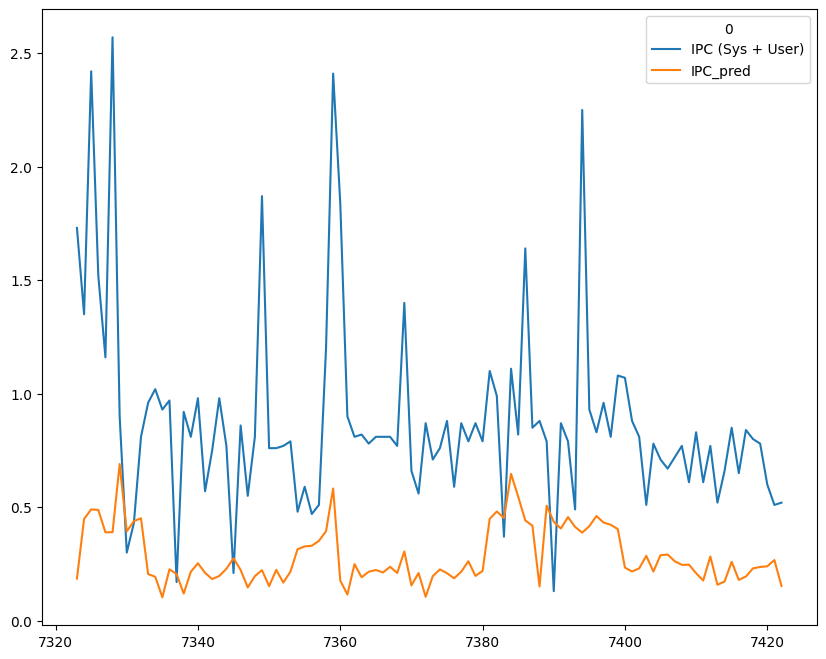

In [40]:
df_final[['IPC (Sys + User)','IPC_pred']][200:300].plot()